# Initial Steps for KPI measurement - Error Rates KPI

To address the Error Rates KPI, one approach is to identify instances where users go back to a previous step, suggesting possible confusion or an error.

Calculate the error rates by identifying these instances. Consider moving from a later step to an earlier one as an error.

- For each group, the error rate is calculated as the proportion of these “error” instances to the total number of steps taken.

- This is another application of probability, where you determine the likelihood of an error occurring.

- Mathematically, for the Test group, the error rate is given by:


$  \text{Error Rate (Test)} = \frac{\text{Number of 'backward' steps taken by 'Test' users}}{\text{Total steps taken by 'Test' users}}  $


- The same formula applies for the Control group.


The initial steps for data analysis in Python include:

1. **Joining Datasets and Clean:** This involves combining the datasets for analytical purposes.  To measure this KPI, we will need to cocatenate df final web data pt 1 and 2 and df final experiment clients.  
 
2. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns and statistics. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

43. **Visualization:** To build intuitive graphs that show the outcome of the analytics.

# 1. Joining Datasets and Clean

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pt_1 = pd.read_csv('../Data/cleaned_pt_1.csv')
pt_2 = pd.read_csv('../Data/cleaned_pt_2.csv')
experiment = pd.read_csv('../Data/df_final_experiment_clients.txt')

In [3]:
#concatenate pt 1 and pt 2 and experiment and remove duplicated columns
df_kpi = pd.concat([pt_1, pt_2, experiment], axis=1)
df_kpi = df_kpi.loc[:,~df_kpi.columns.duplicated()]


In [ ]:
df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation,time_diff
27351,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Test,NaT
27350,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,0 days 00:01:25
27349,5623007.0,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,0 days 00:00:39
27348,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,0 days 00:00:08
1609,4823947.0,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10,Test,NaT
...,...,...,...,...,...,...,...
8533,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:07,Test,0 days 00:00:18
8532,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:44,Test,0 days 00:00:37
8531,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_2,2017-04-13 10:32:53,Control,0 days 00:00:09
8530,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_3,2017-04-13 10:33:40,Control,0 days 00:00:47


In [4]:
#count how many rows have missing values
df_kpi.isnull().sum()

client_id        62549
visitor_id       62549
visit_id         62549
process_step     62549
date_time        62549
Variation       353095
dtype: int64

In [5]:
#remove missing values
df_kpi = df_kpi.dropna()

# 2. EDA



In [6]:
# Ensure date_time is in datetime format
df_kpi['date_time'] = pd.to_datetime(df_kpi['date_time'])

# Sort the DataFrame by visit_id and date_time
df_kpi = df_kpi.sort_values(by=['visit_id', 'date_time'])

In [7]:
# Define the steps in the process
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

In [8]:
# Create a function to assign numeric values to steps
def step_to_num(step):
    return steps.index(step)

**step number column :** 

start = 0

step_1 = 1

step_2 = 2

step_3 = 3

confirm = 4

**error column:**

If you go one step back, so for example if you go back from step_3 to step_2 so it means 2-3 = -1 and it means that -1<0 is **True**

In [13]:
# Apply the function to create a numeric column for process_step
df_kpi['step_num'] = df_kpi['process_step'].apply(step_to_num)

# Identify errors: instances where a user goes back to a previous step
df_kpi['error'] = df_kpi.groupby('visitor_id')['step_num'].diff().fillna(0) < 0

df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,error
27351,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Test,0,False
27350,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,0,False
27349,5623007.0,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,1,False
27348,5623007.0,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,0,True
1609,4823947.0,611052344_43146965242,100057941_88477660212_944512,start,2017-04-09 11:30:10,Test,0,False
...,...,...,...,...,...,...,...,...
8533,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:07,Test,1,False
8532,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_1,2017-04-13 10:32:44,Test,1,False
8531,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_2,2017-04-13 10:32:53,Control,2,False
8530,2979920.0,830229399_73416253406,999971096_28827267783_236076,step_3,2017-04-13 10:33:40,Control,3,False


In [15]:
# Calculate total steps and error steps for each group (Test and Control)
error_rates = df_kpi.groupby('Variation').agg(total_steps=('process_step', 'count'),
                                              error_steps=('error', 'sum')).reset_index()

# Calculate the error rate
error_rates['error_rate'] = error_rates['error_steps'] / error_rates['total_steps']

error_rates

,Variation,total_steps,error_steps,error_rate
0,Control,23532,2272,0.096549
1,Test,26968,2647,0.098153


# 3. Visualization

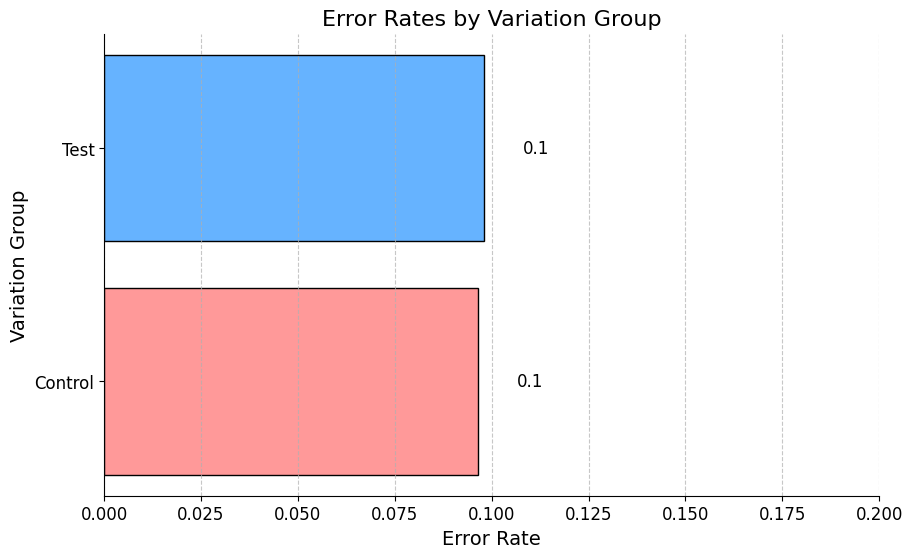

In [23]:
colors = ['#ff9999','#66b3ff']

# Horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(error_rates['Variation'], error_rates['error_rate'], color=colors, edgecolor='black')

# Add data labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center', fontsize=12)

# Add title and labels
plt.title('Error Rates by Variation Group', fontsize=16)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Variation Group', fontsize=14)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Enhance visual appeal
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


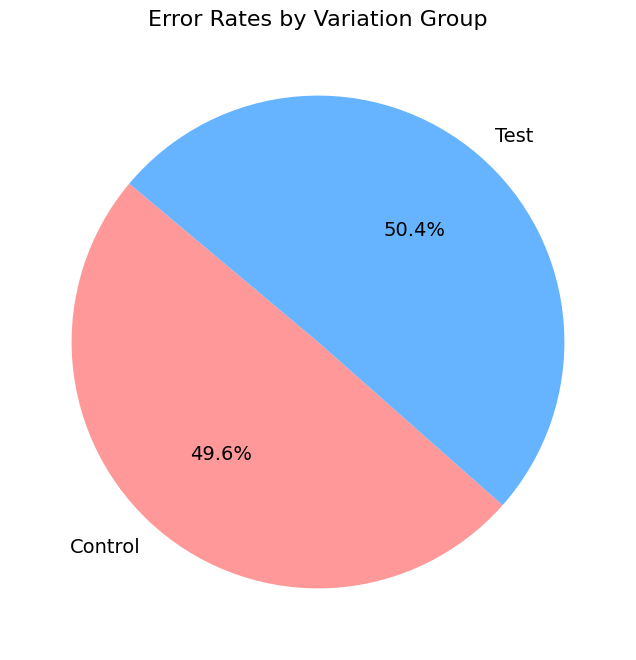

In [24]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(error_rates['error_rate'], labels=error_rates['Variation'], colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Error Rates by Variation Group', fontsize=16)
plt.show()


Save Error rate in a file :

In [25]:
error_rates.to_csv('../Data/error_rates.csv', index=False)